# Lead Scoring Case Study using Logistic Regression

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)

In [2]:
# Importing  dataset

lead = pd.read_csv("Leads.csv")

In [3]:
# Take a copy of the original dataset to assign the Lead score to the original rows. 
lead_copy = lead.copy()

## Data Understanding

In [4]:
# Top rows of the df
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Rows and Columns of the df
lead.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Observation: 
Some variable has missing data. - Some variables have high data variablity

In [7]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Imbalance Analysis
#### To check the balance and data with respect to the target variable - 'Converted'

In [8]:
# Dividing the dataset into two dataset with Converted = 0 and Converted = 1

lead_0= lead.loc[lead["Converted"]==0]
lead_1= lead.loc[lead["Converted"]==1]

In [9]:
# Calculating Imbalance percentage 
# Since the majority is target0 and minority is target1
print (f'Count of Converted = 0: {len(lead_0)} \nCount of Converted = 1: {len(lead_1)}')
print (f'Imbalance Ratio is : {round(len(lead_0)/len(lead_1),2)}')

Count of Converted = 0: 5679 
Count of Converted = 1: 3561
Imbalance Ratio is : 1.59


Text(0, 0.5, 'count')

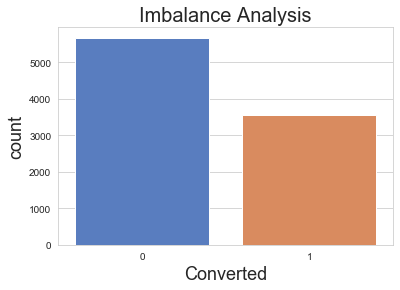

In [10]:
# Plotting the imbalance Analysis:
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize = (6,4))
plt.title('Imbalance Analysis',  fontsize=20)
chart = sns.countplot(data=lead, x='Converted', palette='muted')
plt.xlabel('Converted', fontsize=18)
plt.ylabel('count', fontsize=18)

### Drop the unwanted variables
Since we do not need all the columns provided in the dataset for our analysis, we can drop some of the columns based on our analysis.

### Checking columns with single unique value

In [11]:
cols_with_zerodata_inpercent = round(100*(lead.isnull().sum()/len(lead.index)), 2)

print("Columns with 100% missing data:")
colnames = lead.columns[cols_with_zerodata_inpercent==100].values
print("Num col:", len(colnames), colnames)

#columns with the same values
cols_with_nonuniq_values = lead.nunique()
colnamesnouniq = lead.columns[(cols_with_nonuniq_values <= 1)].values
print("Columns with just 1 unique value:", len(colnamesnouniq), colnamesnouniq)

lead.drop_duplicates(keep=False, inplace=True)

lead.shape

Columns with 100% missing data:
Num col: 0 []
Columns with just 1 unique value: 5 ['Magazine' 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content'
 'I agree to pay the amount through cheque']


(9240, 37)

In [12]:
to_drop_list = ['Magazine' ,'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                'Get updates on DM Content','I agree to pay the amount through cheque']
lead.drop(to_drop_list, axis=1, inplace = True)
lead.shape

(9240, 32)

### Checking the 'Prospect ID' & 'Lead Number' variables

In [13]:
# Checking if this is a unique ID with no duplicates

lead.duplicated(subset = 'Prospect ID').sum()


0

In [14]:
# Checking if this is a unique ID with no duplicates

lead.duplicated(subset = 'Lead Number').sum()

0

#### Drop Prospect ID and Lead Number as they are unique identifiers and need not be used in prediction
Clearly Prospect ID and Lead Number are two variables that represent the unique identfier of the Contacted People and as such will not add value to the model. These columns can be dropped. There are no duplicates int he Prospect ID and the Lead Number columns.

In [15]:
# Dropping the columns as mentioned in the above comment

lead.drop(['Prospect ID','Lead Number'], axis=1, inplace = True)
lead.shape

(9240, 30)

### Handling Missing values in the data:

##### During initial analysis (value_counts) , we could see that there are many variables having 'Select' as the categorical values. These are values that customer has clearly missed to add, so we will consider them as NULL values. We will convert all 'Select' to 'NaN'

In [16]:
#Checking unique value counts of City columns

lead.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [17]:
#Checking unique value counts of Specialization columns

lead.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [18]:
#Checking unique value counts of 'How did you hear about X Education' columns

lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [19]:
#Checking unique value counts of 'Lead Profile' columns

lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [20]:
# Replace all the 'Select' values with 'NaN'

lead = lead.replace('Select', np.nan)

### Handling Null values in the data:
We can drop certain columns with more than certain percentage of missing values. As they have high value of missing percentage, they will not be indicative of the correct weight of the columns in prediction.

In [21]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [22]:
# we will drop the columns having more than 70% NA values.
lead.drop(lead.columns[round(100*(lead.isnull().sum()/len(lead.index)), 2)>70], axis = 1, inplace = True)
lead.shape

(9240, 28)

### Analysis of Score columns assigned by the Sales Team

The following are the score columns assigned by the sales team to the dataset after progressing with the leads. These columns can be dropped as they will not add to the model building.

Analyse the following features before dropping them.

- Lead Quality
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score

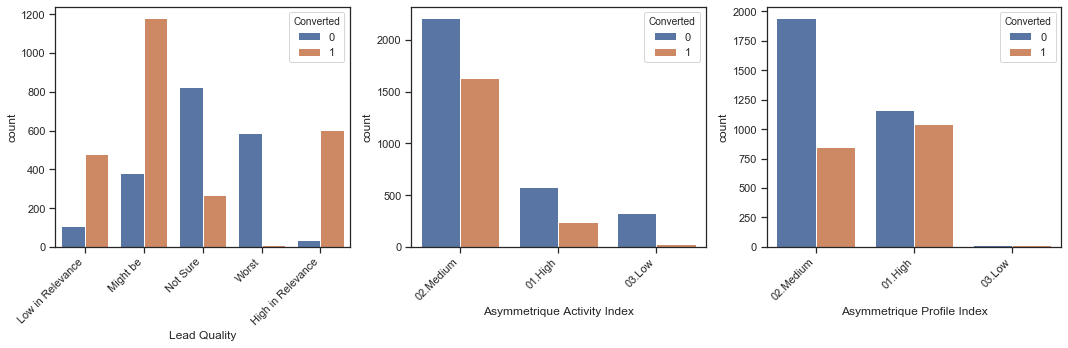

In [23]:
# Analyse the score columns assigned by the sales team to the dataset before dropping them

scoreFeatures = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index' ]

# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)

plt.figure(figsize = (15,5))
for i in enumerate(scoreFeatures):
    plt.subplot(1, 3, i[0]+1)
    chart = sns.countplot(x = i[1], hue = 'Converted', data = lead)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right',)
    plt.tight_layout()

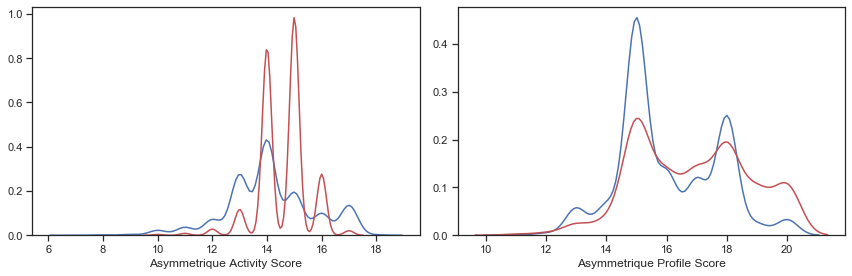

In [24]:
# Analyse the score columns assigned by the sales team to the dataset

fig, axis = plt.subplots(1, 2, figsize = (12,4))
plt1 = sns.distplot(lead_0['Asymmetrique Activity Score'], hist=False, kde=True , color='b' , ax = axis[0])
plt1 = sns.distplot(lead_1['Asymmetrique Activity Score'], hist=False, kde=True , color='r' , ax = axis[0])
plt2 = sns.distplot(lead_0['Asymmetrique Profile Score'], hist=False, kde=True , color='b' , ax = axis[1])
plt2 = sns.distplot(lead_1['Asymmetrique Profile Score'], hist=False, kde=True , color='r' , ax = axis[1])
plt.tight_layout()

##### Drop the columns with more than 45% NaN values
As all the score features have more than 45% Nan values, these can be dropped without affecting our analysis.

In [25]:
# we will drop the columns having more than 70% NA values.
lead.drop(lead.columns[round(100*(lead.isnull().sum()/len(lead.index)), 2)>45], axis = 1, inplace = True)
lead.shape

(9240, 23)

### EDA and Data Visualizations for futher analysis
The next step is to visualise the data using matplotlib and seaborn.

This is one of the most important step - understanding the data. This step will help us understand the properties of data.

- Helps to identify any outliers.
- If there is some obvious multicollinearity going on, this can be identified here.
- Identify the data types of the features and make any conversions if needed.

### Check the data types of all the columns and make changes if needed

- The Categorical features should be identified to create the Dummy variables for them later.
- The Boolean features ('Yes' or 'No' features) can be mapped to 0 and 1 to prepare them for modeling.

#### Identify all the Categorical, boolean and numeric features

In [26]:
# Identify and separate all the Categorical, boolean and numeric features for analysis
targetFeature = []
catFeatures = []
boolFeatures = []
numFeatures = []

for each in lead.columns:
    if each in ('Converted'):
        targetFeature.append(each)
    elif lead[each].nunique() == 2:  #Features with only 2 unique values as boolean
        boolFeatures.append(each)
    elif lead[each].dtype == 'object':
        catFeatures.append(each)
    elif lead[each].dtype in ('int64','float64'):
        numFeatures.append(each)
    else:
        numFeatures.append(each)

In [27]:
print (f'The Target Feature is : \n {targetFeature} \n')
print (f'The Boolean Features are : \n {boolFeatures} \n')
print (f'The Categorical Features are : \n {catFeatures} \n')
print (f'The Numeric Features are :\n {numFeatures} \n')

The Target Feature is : 
 ['Converted'] 

The Boolean Features are : 
 ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview'] 

The Categorical Features are : 
 ['Lead Origin', 'Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'City', 'Last Notable Activity'] 

The Numeric Features are :
 ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'] 



### Univariate Analysis of Boolean Features

Check for the skewness of columns and drop them if they are skewed.

In [28]:
boolFeatures

['Do Not Email',
 'Do Not Call',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [29]:
# Function to check percentage of skewness

def skew(x):
    p = lead[x].value_counts()/(lead.shape[0]-sum(lead[x].isnull()))
    return print(p)

In [30]:
print(skew('Do Not Email'))
print(skew('Do Not Call'))
print(skew('Search'))
print(skew('Newspaper Article'))
print(skew('X Education Forums'))
print(skew('Newspaper'))
print(skew('Digital Advertisement'))
print(skew('Through Recommendations'))
print(skew('A free copy of Mastering The Interview'))

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64
None
No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64
None
No     0.998485
Yes    0.001515
Name: Search, dtype: float64
None
No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64
None
No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64
None
No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64
None
No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64
None
No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64
None
No     0.687446
Yes    0.312554
Name: A free copy of Mastering The Interview, dtype: float64
None


### Observations:
As we can clearly see, the above boolean features except **'A free copy of Mastering The Interview'** are highly skewed and they do not add any value to our analysis. Hence dropping these columns.

In [31]:
to_drop_list = ['Do Not Email',
                'Do Not Call',
                 'Search',
                 'Newspaper Article',
                 'X Education Forums',
                 'Newspaper',
                 'Digital Advertisement',
                 'Through Recommendations']
lead.drop(to_drop_list, axis=1, inplace = True)
lead.shape

(9240, 15)

In [32]:
# Only 'A free copy of Mastering The Interview' variable has two class

varlist =  ['A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function 
lead[varlist] = lead[varlist].apply(binary_map)

### EDA and missing values handling for the Numeric Features

In [33]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

<Figure size 1080x1080 with 0 Axes>

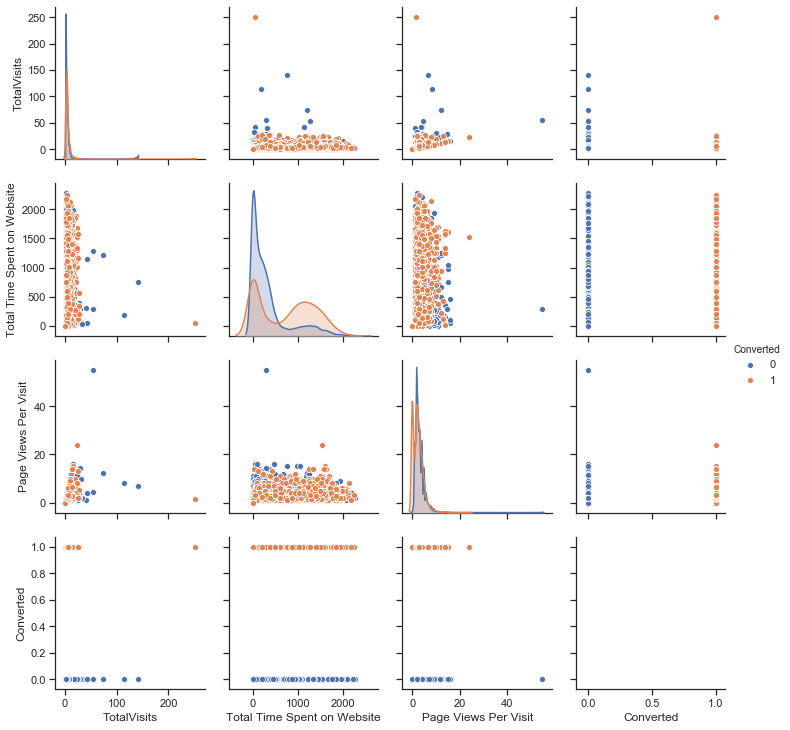

In [34]:
# Analyze the numeric features

sns.set(style='ticks',color_codes=True)
fig = plt.figure(figsize = (15, 15))
g = sns.pairplot(data=lead, hue='Converted', vars=numFeatures + targetFeature);

There is no significant pattern or observation to be made here.

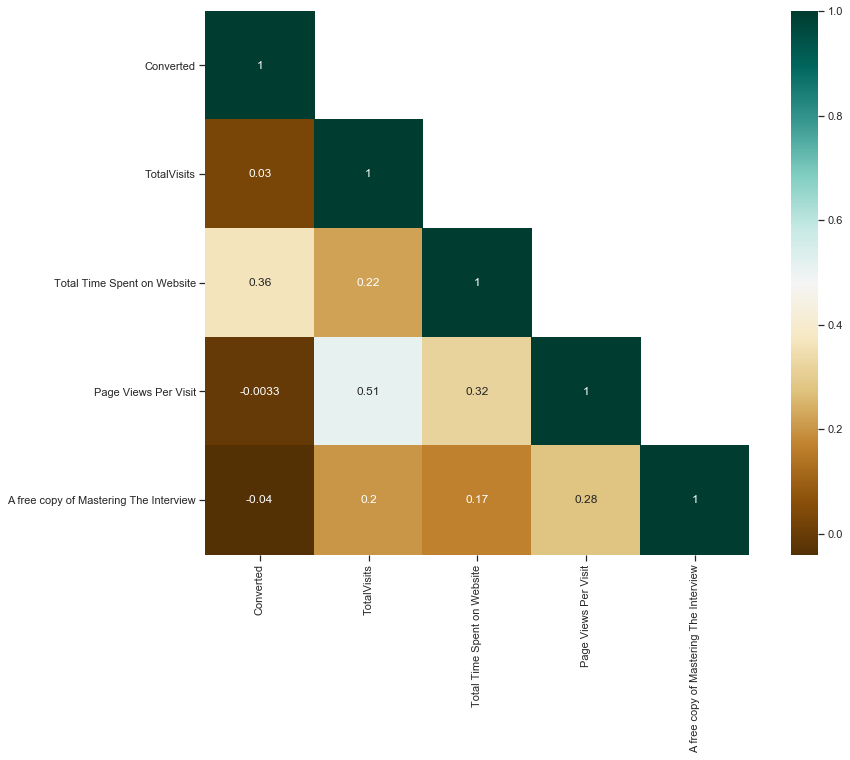

In [35]:
#Checking correlations between numeric variables

cor_mat= lead.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(15,10)
sns.heatmap(cor_mat,mask=mask,square=True,annot=True,cbar=True,cmap="BrBG")
plt.show()

### Observation:
The Heat Map tells us that the highest correlation is between 'TotalVisits' & 'Page View Per Visit'. We will handle this during our Multi Colinearity check.

(9240, 15)


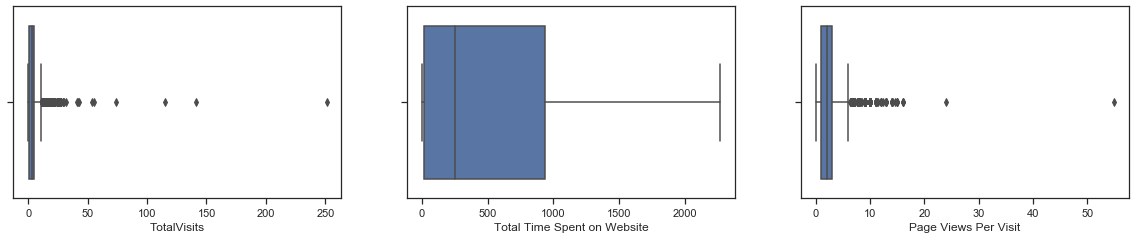

In [36]:
# Checking for outliers in all the numerical columns
print(lead.shape)
plt.figure(figsize=(20, 12))
for i in enumerate(lead[numFeatures]):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.boxplot(lead[numFeatures][i[1]])

In [37]:
Q1 = lead['TotalVisits'].quantile(0.25)
Q3 = lead['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
lead = lead.loc[(lead['TotalVisits'] >= Q1 - 1.5*IQR) & (lead['TotalVisits'] <= Q3 + 1.5*IQR)]

Q1 = lead['Page Views Per Visit'].quantile(0.25)
Q3 = lead['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
lead = lead.loc[(lead['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (lead['Page Views Per Visit'] <= Q3 + 1.5*IQR)]
lead.shape

(8542, 15)

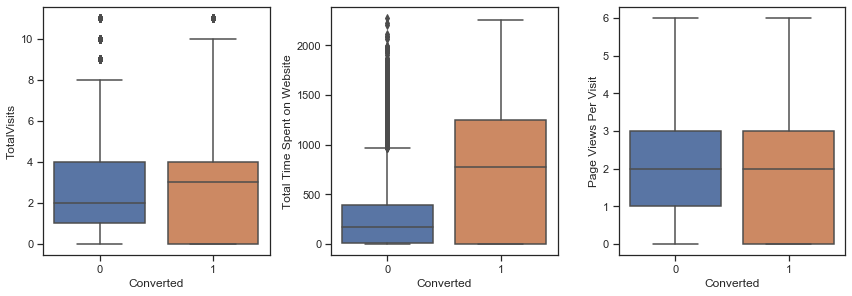

In [38]:
# Box plot to visualise numeric features after outlier capping
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (12, 12))
for i, var in enumerate(numFeatures):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Converted', y = var, data = lead)
    plt.tight_layout()

#### Impute the missing values with mean for 'TotalVisits' and 'Page Views Per Visit'
- After the outlier handling, the mean of the columns for the columns 'TotalVisits' and 'Page Views Per Visit' are same for converted and non converted leads.
- We can impute the missing values with mean for the columns.

In [39]:
# Impute the missing values for the columns with Mean

lead['TotalVisits'].fillna((lead['TotalVisits'].mean()), inplace=True)
lead['Page Views Per Visit'].fillna((lead['Page Views Per Visit'].mean()), inplace=True)

### EDA and Data analysis for Categorical Features

In [40]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'City',
 'Last Notable Activity']

In [41]:
print(skew('Lead Origin'))
print(skew('Lead Source'))
print(skew('Last Activity'))
print(skew('Specialization'))
print(skew('Country'))
print(skew('What is your current occupation'))
print(skew('What matters most to you in choosing a course'))
print(skew('Tags'))
print(skew('City'))
print(skew('Last Notable Activity'))

Landing Page Submission    0.521306
API                        0.404589
Lead Add Form              0.070592
Lead Import                0.003512
Name: Lead Origin, dtype: float64
None
Google               0.320921
Direct Traffic       0.278163
Olark Chat           0.205098
Organic Search       0.110067
Reference            0.051686
Welingak Website     0.015036
Referral Sites       0.012452
Facebook             0.003524
bing                 0.000705
google               0.000587
Click2call           0.000352
Social Media         0.000235
Live Chat            0.000235
testone              0.000117
Pay per Click Ads    0.000117
blog                 0.000117
Press_Release        0.000117
welearnblog_Home     0.000117
youtubechannel       0.000117
NC_EDM               0.000117
WeLearn              0.000117
Name: Lead Source, dtype: float64
None
Email Opened                    0.376727
SMS Sent                        0.302037
Olark Chat Conversation         0.110981
Page Visited on Website  

#### Drop the columns 'Country' and 'What matters most to you in choosing a course' as these are highly skewed

In [42]:
to_drop_list = ['Country', 'What matters most to you in choosing a course']

lead.drop(to_drop_list, axis=1, inplace=True)
lead.shape

(8542, 13)

In [43]:
catFeatures = []

for each in lead.columns:
    if lead[each].dtype == 'object':
        catFeatures.append(each)

catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

#### Replace the values with spelling corrections in the categories for categorical columns

In [44]:
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')

#### Replace the missing values for 'City' column with the mode

In [45]:
# Replace all the NaN values for categorical variables
lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [46]:
for each in catFeatures:
    print (f'Value Counts for {each}: \n {lead[each].value_counts(dropna=False)} \n')

Value Counts for Lead Origin: 
 Landing Page Submission    4453
API                        3456
Lead Add Form               603
Lead Import                  30
Name: Lead Origin, dtype: int64 

Value Counts for Lead Source: 
 Google               2737
Direct Traffic       2368
Olark Chat           1746
Organic Search        937
Reference             440
Welingak Website      128
Referral Sites        106
Facebook               30
NaN                    29
bing                    6
Click2call              3
Social Media            2
Live Chat               2
testone                 1
WeLearn                 1
blog                    1
welearnblog_Home        1
youtubechannel          1
Press_Release           1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64 

Value Counts for Last Activity: 
 Email Opened                    3218
SMS Sent                        2580
Olark Chat Conversation          948
Page Visited on Website          525
Converted to

### Bucketing the categories with lesser count for the categorical features

In [47]:
# Since there are so many categories in the categorical features with less than 2% counts each, we can 
# combine all those categories into one category called 'Others'

for each in catFeatures:
    replaceFeatures = []
    categories = lead[each].value_counts()
    list1 = lead[each].value_counts().keys().tolist()
    for i, v in enumerate (categories):
        if v <= 200:  ## Anything less than 200
            replaceFeatures.append(list1[i])
    lead[each] = lead[each].replace(replaceFeatures, 'Others')
    print (f'Categories replaced for column {each} are: \n {replaceFeatures} \n')

Categories replaced for column Lead Origin are: 
 ['Lead Import'] 

Categories replaced for column Lead Source are: 
 ['Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Social Media', 'Live Chat', 'WeLearn', 'testone', 'blog', 'Press_Release', 'welearnblog_Home', 'youtubechannel', 'NC_EDM', 'Pay per Click Ads'] 

Categories replaced for column Last Activity are: 
 ['Form Submitted on Website', 'Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Received', 'Email Marked Spam', 'Visited Booth in Tradeshow', 'Resubscribed to emails'] 

Categories replaced for column Specialization are: 
 ['Media and Advertising', 'Travel and Tourism', 'International Business', 'Healthcare Management', 'Hospitality Management', 'E-COMMERCE', 'Retail Management', 'Rural and Agribusiness', 'E-Business', 'Services Excellence'] 

Categories replaced for column What is your current occupation are: 
 ['Student', 'Other', '

#### Replace the missing values for categorical columns

We will impute the NULL values as 'Unknown' as not selecting a Specialization could mean that he or she has not worked in any industry earlier but since we are not sure of it, we will categorise them into Unknown.

In [48]:
# Imputing Null with Others, as it is generally Unknown sources
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Unknown')

We will impute the NULL values with MODE the mode value 'Unemployed', in this case as not selecting a 'What is your current occupation' could mean that he or she was Unemployed. So we will categorise them into Unemployed.

In [49]:
# Imputing Null values with Unemployed
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')

We will impute the NULL values with the MODE value 'Google' for 'Lead Source'.

In [50]:
# Imputing Null with Others, as it is generally Unknown sources
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')

We will impute the NULL values with the MODE value 'Email Opened' for 'Last Activity' .

In [51]:
# Imputing Null with Others, as it is generally Unknown sources
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')

### Visualize the Categorical variables after handling missing values and bucketing

In [52]:
catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'City',
 'Last Notable Activity']

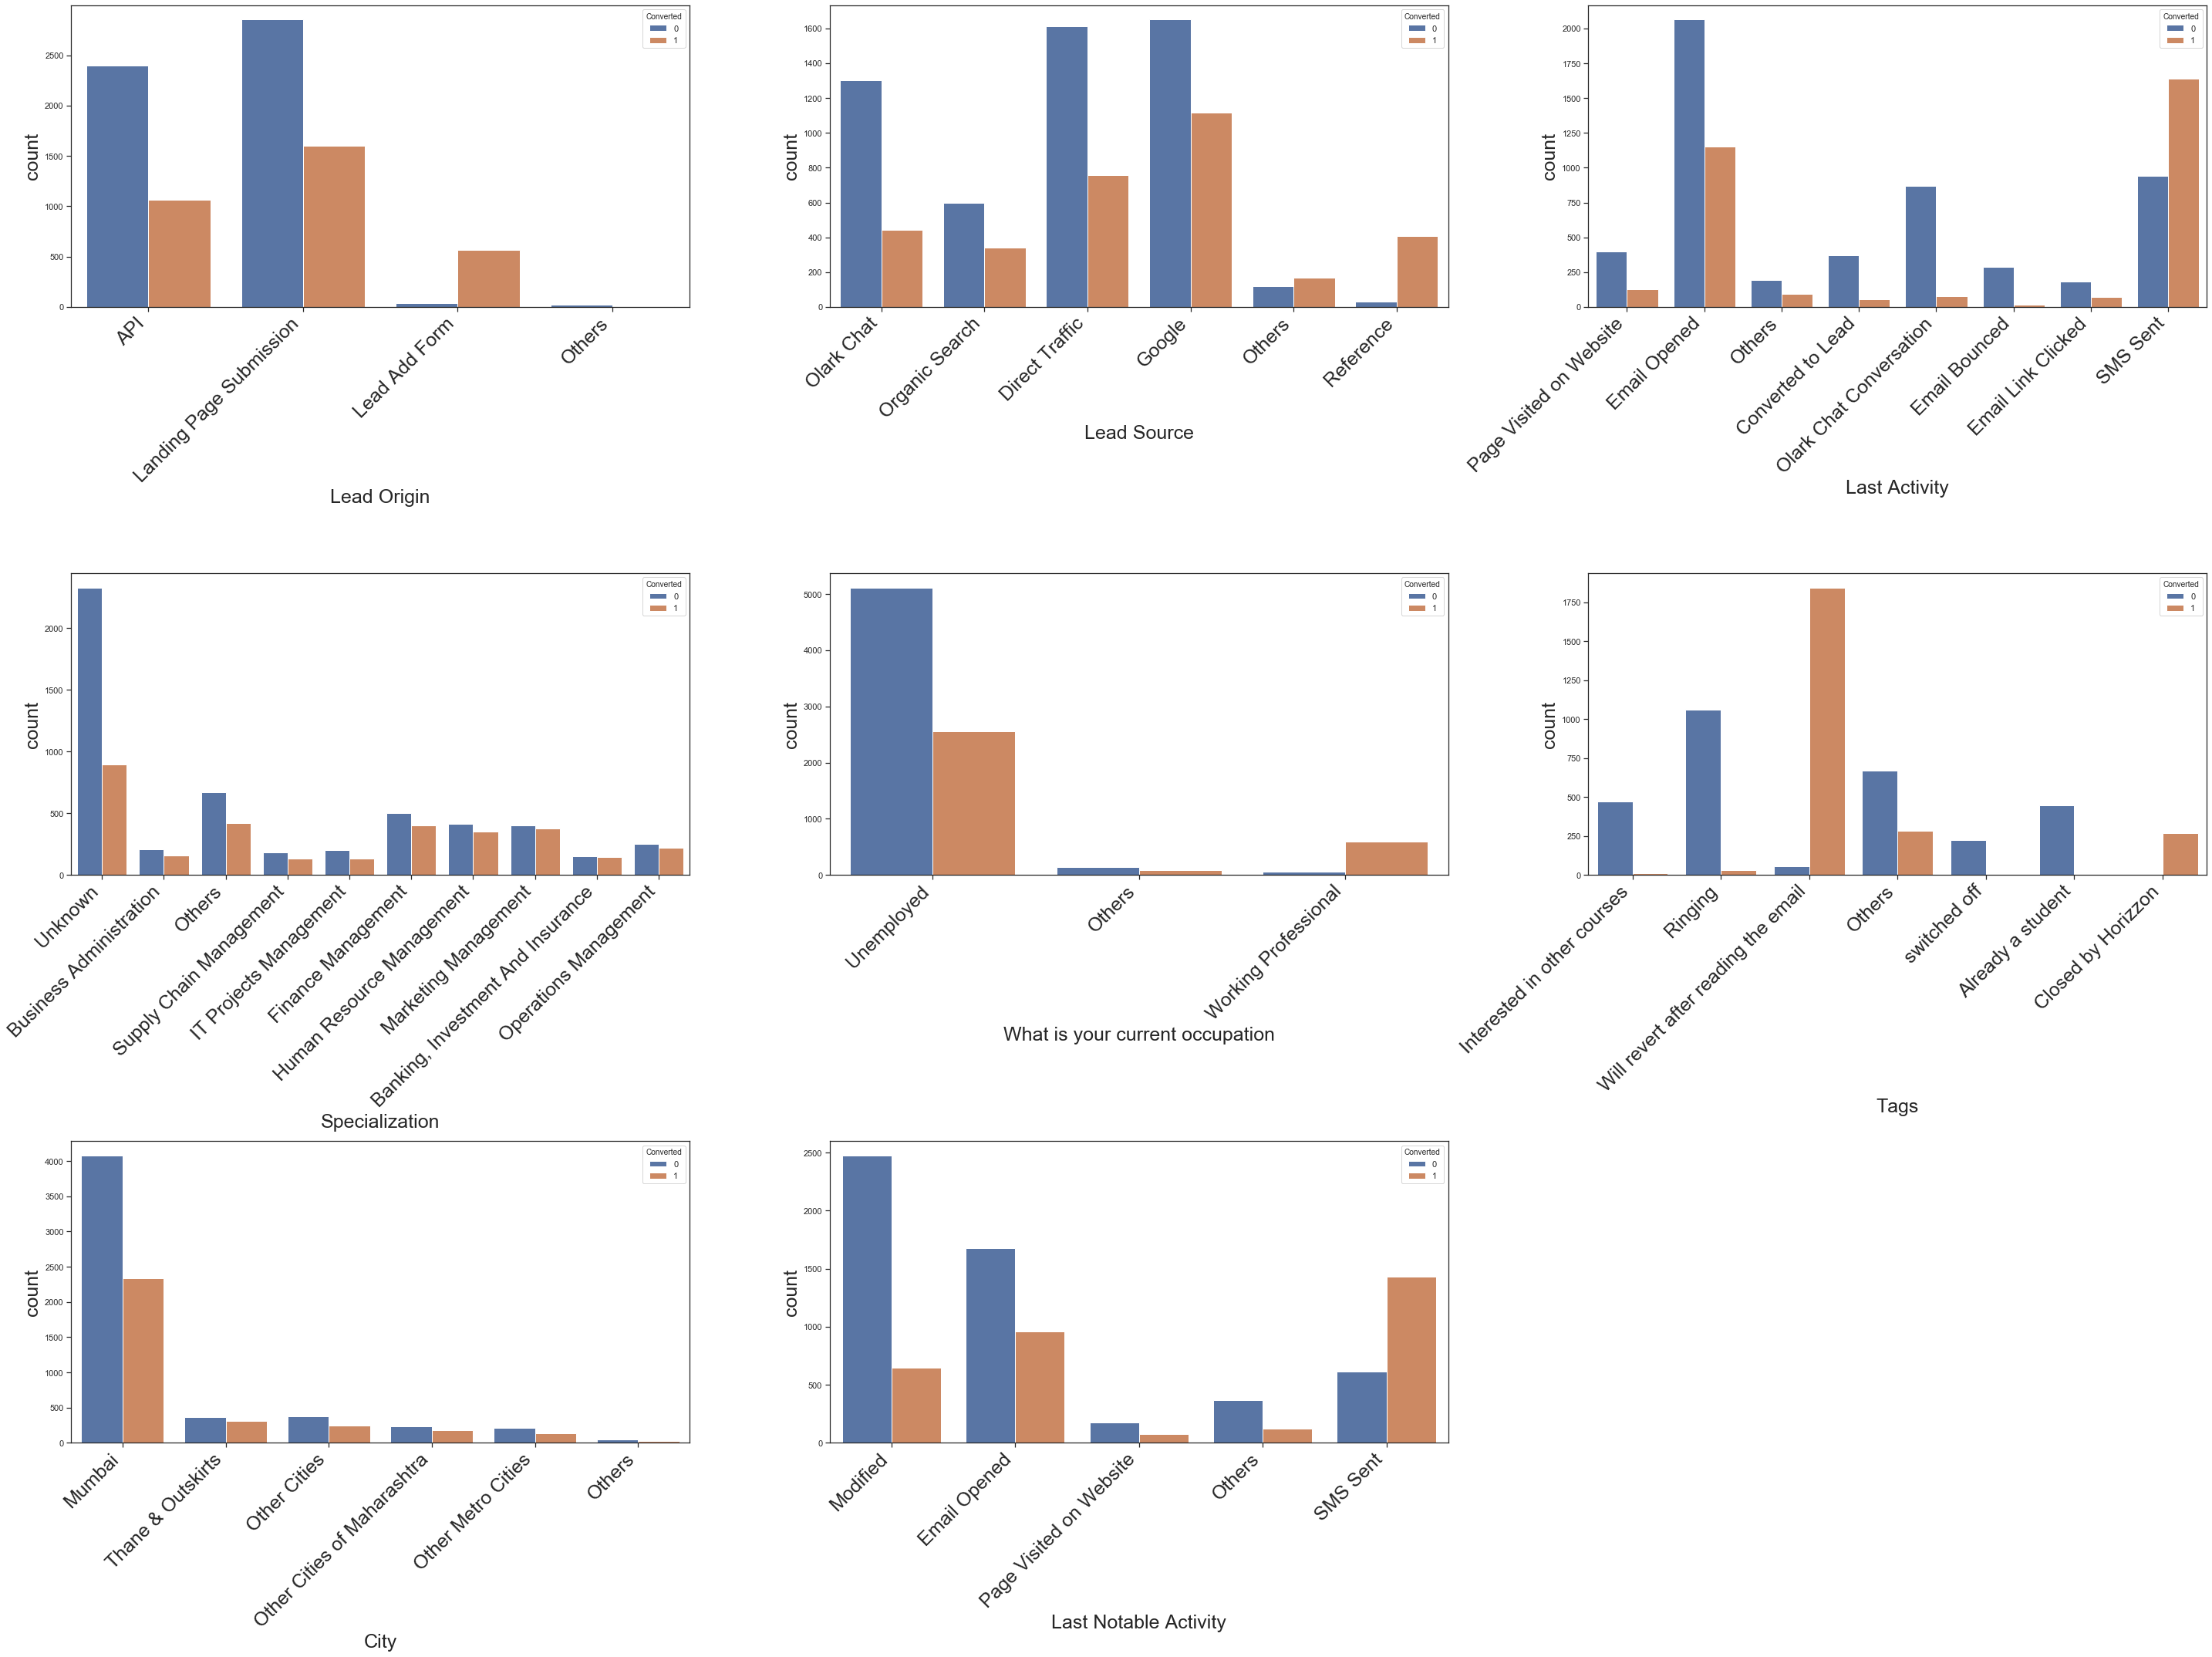

In [53]:
# Count plot for the categorical variables
sns.set(style='ticks',color_codes=True)
plt.figure(figsize = (40, 30))
for i, x_var in enumerate(catFeatures):
    plt.subplot(3, 3, i+1)
    chart = sns.countplot(x = x_var, hue = 'Converted', data = lead)
    chart.set_xticklabels(chart.get_xticklabels(), fontsize=25, rotation=45, ha='right')
    plt.xlabel(x_var, fontsize=25)
    plt.ylabel('count', fontsize=25)
    plt.tight_layout()

##### Drop the columns 'Tag' and 'Last Activity' as the columns are added by Sales team while working on the leads and does not directly contribute to identifying the hot leads

In [54]:
to_drop_list = ['Tags', 'Last Notable Activity']
lead.drop(to_drop_list, axis=1, inplace = True)
lead.shape

(8542, 11)

In [55]:
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
dtype: float64

### Model Building
Now that the data analysis is completed, data is cleaned and outliers handled, we can proceed to building the model.

#### Get Dummy Variables:
- For all the categorical features, dummy variables need to be created.
- Instead of dropping the first dummy varibale for each categorical variable (using drop_first = True), we can select a specified dummy variable and drop it, so that we can have explainable features.

In [56]:
catFeatures = []

for each in lead.columns:
    if lead[each].dtype == 'object':
        catFeatures.append(each)

catFeatures

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'City']

In [57]:
# Getting dummy variables and adding the results to the master dataframe

for each in catFeatures:
    dummy = pd.get_dummies(lead[each], drop_first=False, prefix=each)
    lead = pd.concat([lead,dummy],1)
    print (f'dummy columns are added for the feature {each}')


dummy columns are added for the feature Lead Origin
dummy columns are added for the feature Lead Source
dummy columns are added for the feature Last Activity
dummy columns are added for the feature Specialization
dummy columns are added for the feature What is your current occupation
dummy columns are added for the feature City


In [58]:
lead.head(5)

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Unknown,What is your current occupation_Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Others,City_Thane & Outskirts
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Unknown,Unemployed,Mumbai,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Unknown,Unemployed,Mumbai,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Others,Mumbai,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Others,Unemployed,Mumbai,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Unknown,Unemployed,Mumbai,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0


In [59]:
# Drop the sepcific dummy columns created after the dummy variables are added for these categorical columns

dummydropFeatures = ['Lead Origin_Others', 
                     'City_Others',
                     'Lead Source_Others',
                     'Specialization_Unknown',
                     'What is your current occupation_Others',
                     'Last Activity_Others']

lead.drop(dummydropFeatures, axis=1, inplace=True )
lead.shape

(8542, 42)

In [60]:
# Drop the original categorical columns since the dummy variables are added for these categorical columns

lead.drop(catFeatures, axis=1, inplace=True )
lead.head(5)

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
0,0,0.0,0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1,0,5.0,674,2.5,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
4,1,2.0,1428,1.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


#### Train-Test Split and Logistic Regression Model Building:
The following steps are followed in building a model:

- Import the necessary packages for model preprocessing and model building
- Split the train data and test data at 70% and 30%
- Scale the Numeric features using MinMaxScaler
- Build the model using a combination of automatic and manual processing
- Start the model with RFE features (automatic) and use feature reduction by dropping one feature at a time.
- Build the model and fit the training data.

In [61]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

In [62]:
# The target variable in y
y = lead['Converted']
 
#The feature variables in X
X = lead.drop('Converted', axis=1)

In [63]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state=101)

##### Copy of the primary dataframe is created here. This will be trimmed and chopped employing multiple approaches before we draw our conclusion.

In [64]:
X_copy = X_train.copy(deep=True)
Y_copy = y_train.copy(deep=True)

### Scaling the Numerical features
- The Numeric features need to be scaled before building the model.
- 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit' are the numeric features to be scaled.

In [65]:
numFeatures

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [66]:
#### Scaling the numerical columns
scaler = MinMaxScaler()

X_train[numFeatures] = scaler.fit_transform(X_train[numFeatures])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
7527,0.000000,0.000000,0.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2135,0.272727,0.307278,0.500000,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8742,0.181818,0.017520,0.333333,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7521,0.272727,0.728661,0.500000,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0
3937,0.181818,0.646451,0.333333,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


### Build the Logistic Regression model with RFE features

In [67]:
# Build the Logistic Regression Model
logmodel = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [68]:
#list of RFE supported columns
cols = X_train.columns[rfe.support_]
cols

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [69]:
# Defining a function to generate the model by passing the model name and the columns used for the model 

def gen_model(model_no, cols):
    X_train_sm = sm.add_constant(X_train[cols])
    model_no = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
    res = model_no.fit()
    print (res.summary())
    return res

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
def calcVIF(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model - Iteration 1

In [71]:
# Generate the first model using the RFE features

logm1 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm1, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5958
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.8
Date:                Mon, 08 Feb 2021   Deviance:                       4935.6
Time:                        22:59:38   Pearson chi2:                 7.02e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Page Views Per Visit,6.94
3,Lead Origin_Landing Page Submission,6.89
0,TotalVisits,5.64


#### Building Iterations of the model after reducing the features
The next step is to build iterations of the model after dropping one feature at a time using P values and VIFs

### Model - Iteration 2

In [72]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Page Views Per Visit',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5959
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.6
Date:                Mon, 08 Feb 2021   Deviance:                       4961.2
Time:                        22:59:39   Pearson chi2:                 6.99e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
2,Lead Origin_Landing Page Submission,6.64
0,TotalVisits,3.08
16,Specialization_Others,2.39


### Model - Iteration 3

In [73]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Lead Origin_Landing Page Submission',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5960
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.4
Date:                Mon, 08 Feb 2021   Deviance:                       5058.7
Time:                        22:59:39   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.98
1,Total Time Spent on Website,2.20
7,Last Activity_SMS Sent,1.53


### Model - Iteration 4

In [74]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Others',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5961
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2529.5
Date:                Mon, 08 Feb 2021   Deviance:                       5058.9
Time:                        22:59:39   Pearson chi2:                 6.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.52
1,Total Time Spent on Website,2.16
7,Last Activity_SMS Sent,1.51


### Model - Iteration 5

In [75]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Supply Chain Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5962
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2530.1
Date:                Mon, 08 Feb 2021   Deviance:                       5060.3
Time:                        22:59:40   Pearson chi2:                 6.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.45
1,Total Time Spent on Website,2.15
7,Last Activity_SMS Sent,1.51


### Model - Iteration 6

In [76]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Operations Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5963
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.0
Date:                Mon, 08 Feb 2021   Deviance:                       5061.9
Time:                        22:59:40   Pearson chi2:                 6.74e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.37
1,Total Time Spent on Website,2.14
7,Last Activity_SMS Sent,1.50


### Model - Iteration 7

In [77]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_IT Projects Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5964
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.7
Date:                Mon, 08 Feb 2021   Deviance:                       5063.4
Time:                        22:59:40   Pearson chi2:                 6.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.33
1,Total Time Spent on Website,2.13
7,Last Activity_SMS Sent,1.50


### Model - Iteration 8

In [78]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Finance Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5965
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2532.8
Date:                Mon, 08 Feb 2021   Deviance:                       5065.6
Time:                        22:59:40   Pearson chi2:                 6.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.21
1,Total Time Spent on Website,2.12
7,Last Activity_SMS Sent,1.50


### Model - Iteration 9

In [79]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Business Administration',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5966
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2534.2
Date:                Mon, 08 Feb 2021   Deviance:                       5068.4
Time:                        22:59:40   Pearson chi2:                 6.73e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.17
1,Total Time Spent on Website,2.11
7,Last Activity_SMS Sent,1.50


### Model - Iteration 10

In [80]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Human Resource Management',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5967
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2536.5
Date:                Mon, 08 Feb 2021   Deviance:                       5073.0
Time:                        22:59:41   Pearson chi2:                 6.64e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
0,TotalVisits,2.11
1,Total Time Spent on Website,2.10
7,Last Activity_SMS Sent,1.50


### Model - Iteration 10

In [81]:
# Dropping the next unwanted variable to pass to the model.
cols = cols.drop('Specialization_Banking, Investment And Insurance',1)
logm2 = LogisticRegression()

#Pass the columns to generate the model and print summary
res = gen_model(logm2, cols)

# Check the VIF for the features
calcVIF(cols).head(3)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 5979
Model:                            GLM   Df Residuals:                     5968
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2538.8
Date:                Mon, 08 Feb 2021   Deviance:                       5077.6
Time:                        22:59:41   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

,Features,VIF
1,Total Time Spent on Website,2.09
0,TotalVisits,2.08
7,Last Activity_SMS Sent,1.50


### Getting the predicted values on the train set
The following steps are done after building the model

- Get the predictions on the training dataset with the final model
- Use the cut-off with 0.5 for the initial predictions
- Derive the Classification report and Classification metrics with the initial cutoff and predictions
- Derive the Area under the ROC curve for the initial cut-off and predictions
- Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff
- Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off
- Get the final_Predictions and the metrics for the Predictions with the optimal cut-off
- Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions
- Measuring the Precision Recall Trade-off

Get the predictions on the training dataset with the final model.

- Use the cut-off with 0.5 for the initial predictions.

In [82]:
# Getting the predicted values on the train set

X_train_sm = sm.add_constant(X_train[cols])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7527    0.058619
2135    0.242888
8742    0.210942
7521    0.972362
3937    0.957131
1551    0.160413
7163    0.032219
3988    0.034412
1354    0.861591
4743    0.849099
dtype: float64

In [83]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
7527,0,0.058619,7527
2135,1,0.242888,2135
8742,1,0.210942,8742
7521,1,0.972362,7521
3937,1,0.957131,3937


In [84]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
7527,0,0.058619,7527,0
2135,1,0.242888,2135,0
8742,1,0.210942,8742,0
7521,1,0.972362,7521,1
3937,1,0.957131,3937,1


### Evaluation Metrics for the Train dataset
Derive the Classification report and Classification metrics with the initial cutoff and predictions

In [85]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [86]:
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['Predicted']))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      3723
           1       0.78      0.71      0.74      2256

    accuracy                           0.81      5979
   macro avg       0.81      0.79      0.80      5979
weighted avg       0.81      0.81      0.81      5979



In [87]:
def get_metrics(actual, predicted):
    confusion = confusion_matrix(actual, predicted)

    # Let's check the overall accuracy.
    Accuracy = metrics.accuracy_score(actual, predicted)

    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    TP = confusion[1,1] # true positive 

    # Calculate the different Metrics
    Sensitivity = TP / float(TP+FN) # calculate Sensitivity
    Specificity = TN / float(TN+FP) # calculate specificity
    Precision   = TP / float(TP+FP) # calculate Precision
    Recall      = TN / float(TN+FP) # calculate Recall
    FPR = (FP/ float(TN+FP))        # Calculate False Postive Rate - predicting conversion when customer does not convert
    PPV = (TP / float(TP+FP))       # positive predictive value 
    NPV = (TN / float(TN+ FN))      # Negative predictive value
    
    F1 = 2*(Precision*Recall)/(Precision+Recall)

    # Print the Metrics
    print (f'The Confusion Matrix is \n {confusion}')
    print (f'The Accuracy is    : {round (Accuracy,2)} ({Accuracy})')
    print (f'The Sensitivity is : {round (Sensitivity,2)} ({Sensitivity})')
    print (f'The Specificity is : {round (Specificity,2)} ({Specificity})')
    print (f'The Precision is   : {round (Precision, 2)} ({Precision})')
    print (f'The Recall is      : {round (Recall, 2)} ({Recall})')
    print (f'The f1 score is    : {round (F1, 2)} ({F1})')
    print (f'The False Positive Rate is       : {round (FPR, 2)} ({FPR})')
    print (f'The Positive Predictive Value is : {round (PPV, 2)} ({PPV})')
    print (f'The Negative Predictive Value is : {round (NPV, 2)} ({NPV})')

In [88]:
def plot_confusion_metrics(actual, predicted):
    sns.set_style('white')
    cm = confusion_matrix(actual, predicted)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('True Converted and Predicted Converted Confusion Matrix', fontsize=14)
    plt.ylabel('True Converted', fontsize=14)
    plt.xlabel('Predicted Converted', fontsize=14)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, fontsize=14)
    plt.yticks(tick_marks, classNames, fontsize=14)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize=14, ha='center')
    plt.show()

In [89]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

The Confusion Matrix is 
 [[3272  451]
 [ 663 1593]]
The Accuracy is    : 0.81 (0.8136812175949155)
The Sensitivity is : 0.71 (0.7061170212765957)
The Specificity is : 0.88 (0.8788611334944937)
The Precision is   : 0.78 (0.7793542074363993)
The Recall is      : 0.88 (0.8788611334944937)
The f1 score is    : 0.83 (0.8261220424564895)
The False Positive Rate is       : 0.12 (0.12113886650550632)
The Positive Predictive Value is : 0.78 (0.7793542074363993)
The Negative Predictive Value is : 0.83 (0.8315120711562897)


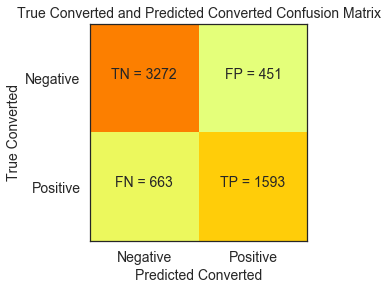

In [90]:
plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)

### Derive the Area under the ROC curve for the initial cut-off and predictions

In [91]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                          y_train_pred_final.Converted_prob, drop_intermediate = False )

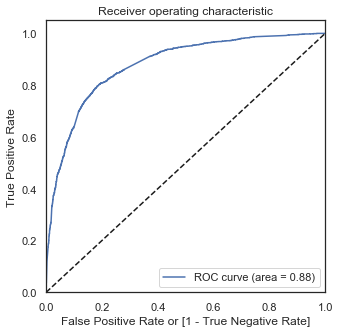

In [93]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Getting the Optimal cutoff and final evaluation Metrics for Train Dataset
##### Calculate the predicted values for the different cut-offs to arrive at the optimal cutoff

In [94]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7527,0,0.058619,7527,0,1,0,0,0,0,0,0,0,0,0
2135,1,0.242888,2135,0,1,1,1,0,0,0,0,0,0,0
8742,1,0.210942,8742,0,1,1,1,0,0,0,0,0,0,0
7521,1,0.972362,7521,1,1,1,1,1,1,1,1,1,1,1
3937,1,0.957131,3937,1,1,1,1,1,1,1,1,1,1,1


In [95]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

### Plot the Sensitivity / Specificity curve for the different cut-offs and identify the optimal cut-off

In [96]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

#     TN = confusion[0,0] # true negatives
#     FP = confusion[0,1] # false positives
#     FN = confusion[1,0] # false negatives
#     TP = confusion[1,1] # true positive 
    
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i , accuracy, sensitivity, specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.377321     1.000000     0.000000
0.1          0.1  0.596588     0.968972     0.370937
0.2          0.2  0.721024     0.925089     0.597368
0.3          0.3  0.793945     0.827128     0.773838
0.4          0.4  0.811841     0.761525     0.842331
0.5          0.5  0.813681     0.706117     0.878861
0.6          0.6  0.794447     0.580230     0.924255
0.7          0.7  0.775380     0.492021     0.947086
0.8          0.8  0.752634     0.394947     0.969380
0.9          0.9  0.701288     0.227837     0.988182


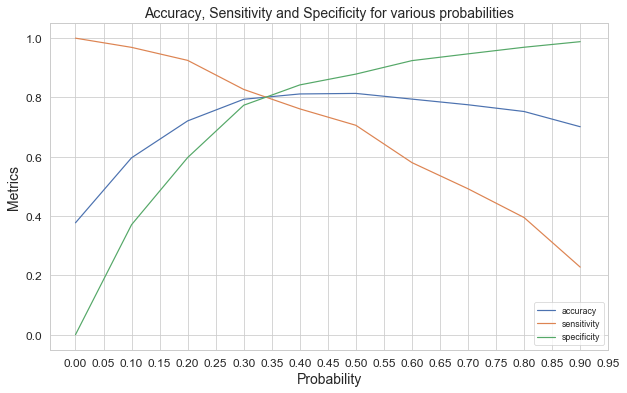

In [97]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'], figsize=(10,6))

plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.title('Accuracy, Sensitivity and Specificity for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

#### From the curve above, 0.35 can be taken as the optimum point to take it as a cutoff probability

### Get the final_Predictions and the metrics for the Predictions with the optimal cut-off

In [98]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
7527,0,0.058619,7527,0,1,0,0,0,0,0,0,0,0,0,0
2135,1,0.242888,2135,0,1,1,1,0,0,0,0,0,0,0,0
8742,1,0.210942,8742,0,1,1,1,0,0,0,0,0,0,0,0
7521,1,0.972362,7521,1,1,1,1,1,1,1,1,1,1,1,1
3937,1,0.957131,3937,1,1,1,1,1,1,1,1,1,1,1,1


In [99]:
# Get all the necessary Metrics for the Training dataset for cut-off 0.36
print (f'The Final Evaluation Metrics for the train Dataset: ')
print (f'----------------------------------------------------')

get_metrics(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted'])

The Final Evaluation Metrics for the train Dataset: 
----------------------------------------------------
The Confusion Matrix is 
 [[3049  674]
 [ 467 1789]]
The Accuracy is    : 0.81 (0.8091654122763003)
The Sensitivity is : 0.79 (0.7929964539007093)
The Specificity is : 0.82 (0.8189632017190438)
The Precision is   : 0.73 (0.7263499796995534)
The Recall is      : 0.82 (0.8189632017190438)
The f1 score is    : 0.77 (0.7698813575086869)
The False Positive Rate is       : 0.18 (0.18103679828095623)
The Positive Predictive Value is : 0.73 (0.7263499796995534)
The Negative Predictive Value is : 0.87 (0.8671786120591581)


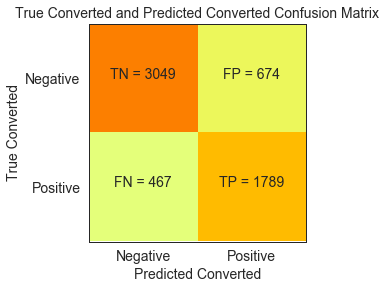

In [100]:
# Plot Confusion metrics for final predicted for train data

plot_confusion_metrics(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

In [101]:
# Classification report for the training dataset
print (classification_report(y_train_pred_final['Converted'], y_train_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      3723
           1       0.73      0.79      0.76      2256

    accuracy                           0.81      5979
   macro avg       0.80      0.81      0.80      5979
weighted avg       0.81      0.81      0.81      5979



#### Assign a Lead Score to the Training dataset based on the Conversion probability of the final_Predictions

In [102]:
# Assign a Lead score based on the predictions

y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
7527,0,0.058619,7527,0,6
2135,1,0.242888,2135,0,24
8742,1,0.210942,8742,0,21
7521,1,0.972362,7521,1,97
3937,1,0.957131,3937,1,96


In [103]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
7527,0,0.058619,7527,0,1,0,0,0,0,0,0,0,0,0,0,6
2135,1,0.242888,2135,0,1,1,1,0,0,0,0,0,0,0,0,24
8742,1,0.210942,8742,0,1,1,1,0,0,0,0,0,0,0,0,21
7521,1,0.972362,7521,1,1,1,1,1,1,1,1,1,1,1,1,97
3937,1,0.957131,3937,1,1,1,1,1,1,1,1,1,1,1,1,96


### Measuring the Precision Recall Trade-off

In [104]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_prob'])

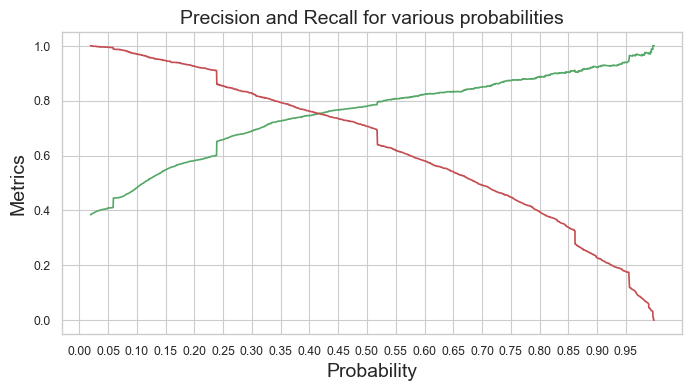

In [105]:
# Plot the Precision / Recall tradeoff chart
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster

plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.title('Precision and Recall for various probabilities', fontsize=14)
plt.xlabel('Probability', fontsize=14)
plt.ylabel('Metrics', fontsize=14)
plt.show()

### Model Validation
The next step is to validate the model with the test dataset.

The following are the steps invoved:

- Fit the Numeric features of the Test dataset with the Scaler method
- Making Predictions on the X_test dataset
- Create a Dataset with the Prospect ID and the conversion probability for the test dataset
- Generate the Lead Score for the test dataset based on the predicted probability from the model
- Get the final Predicted values using the optimal threshold value
- Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

#### Making Predictions for the Test Dataset

In [106]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
4017,2.0,1387,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
915,2.0,250,2.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4643,6.0,1183,3.0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
8433,3.0,1318,3.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
8072,0.0,0,0.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


Fit the Numeric features of the Test dataset with the Scaler method

In [107]:
# Fit the Numeric features of the Test dataset with the Scaler method
X_test[numFeatures] = scaler.transform(X_test[numFeatures])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_Finance Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
4017,0.181818,0.623091,0.166667,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
915,0.181818,0.112309,0.333333,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4643,0.545455,0.531447,0.500000,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0
8433,0.272727,0.592093,0.500000,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
8072,0.000000,0.000000,0.000000,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [108]:
X_test.shape

(2563, 35)

#### Making Predictions on the X_test dataset using the final model

In [109]:
# Making Predictions on the X_test dataset

X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Marketing Management,What is your current occupation_Working Professional
4017,0.181818,0.623091,0,0,0,0,1,0,0,0
915,0.181818,0.112309,0,0,0,0,0,0,1,0
4643,0.545455,0.531447,0,0,0,0,0,0,0,0
8433,0.272727,0.592093,0,0,0,0,0,1,0,0
8072,0.000000,0.000000,1,0,0,0,0,1,1,0


In [110]:
y_test_pred = res.predict(X_test_sm)

In [111]:
y_test_pred[:5]

4017    0.202982
915     0.145928
4643    0.530844
8433    0.803800
8072    0.967877
dtype: float64

###### Create a Dataset with the Prospect ID and the conversion probability for the test dataset

In [112]:
# Converting y_pred to a dataframe from an array
y_test_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_pred_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_testest_pred_1
y_test_pred_final = pd.concat([y_test_df, y_test_pred_df],axis=1)

# Renaming the column 
y_test_pred_final= y_test_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_test_pred_final.head(10)

,Converted,Converted_prob,Prospect ID
0,1,0.202982,4017
1,0,0.145928,915
2,1,0.530844,4643
3,0,0.803800,8433
4,1,0.967877,8072
5,0,0.079100,7022
6,1,0.517484,1269
7,0,0.127009,5750
8,0,0.238431,7402
9,0,0.058619,8652


#### Generate the Lead Score for the test dataset based on the predicted probability from the model

In [113]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['Prospect ID','Converted','Converted_prob']]
y_test_pred_final['Lead_Score'] = y_test_pred_final.Converted_prob.map( lambda x: round(x*100))
y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,4017,1,0.202982,20
1,915,0,0.145928,15
2,4643,1,0.530844,53
3,8433,0,0.803800,80
4,8072,1,0.967877,97


#### Get the final Predicted values using the optimal threshold value

In [114]:
# Predict the final y values based on the threshold of 0.35
y_test_pred_final['final_Predicted'] = y_test_pred_final['Converted_prob'].map(lambda x: 1 if x > 0.35 else 0)

y_test_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,4017,1,0.202982,20,0
1,915,0,0.145928,15,0
2,4643,1,0.530844,53,1
3,8433,0,0.803800,80,1
4,8072,1,0.967877,97,1


### Final Evaluation Metrics for the Test Dataset

Get the Final evaluation Metrics for the test dataset with the actual converted values and final predicted values

In [115]:
# Get all the necessary Metrics for the Test dataset 

print (f'The Final Evaluation Metrics for the test Dataset: ')
print (f'---------------------------------------------------')
get_metrics(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted'])

The Final Evaluation Metrics for the test Dataset: 
---------------------------------------------------
The Confusion Matrix is 
 [[1287  300]
 [ 197  779]]
The Accuracy is    : 0.81 (0.8060866172454155)
The Sensitivity is : 0.8 (0.798155737704918)
The Specificity is : 0.81 (0.8109640831758034)
The Precision is   : 0.72 (0.7219647822057461)
The Recall is      : 0.81 (0.8109640831758034)
The f1 score is    : 0.76 (0.7638808569776292)
The False Positive Rate is       : 0.19 (0.1890359168241966)
The Positive Predictive Value is : 0.72 (0.7219647822057461)
The Negative Predictive Value is : 0.87 (0.8672506738544474)


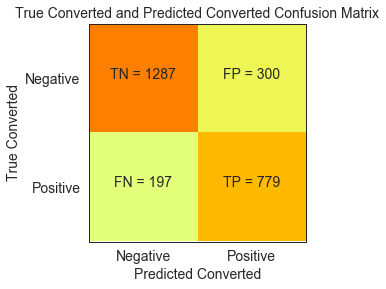

In [116]:
# Plot Confusion metrics for final predicted for test data

plot_confusion_metrics(y_test_pred_final.Converted, y_test_pred_final.final_Predicted)

In [117]:
# Print the classification report for the Test Dataset
print (classification_report(y_test_pred_final['Converted'], y_test_pred_final['final_Predicted']))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1587
           1       0.72      0.80      0.76       976

    accuracy                           0.81      2563
   macro avg       0.79      0.80      0.80      2563
weighted avg       0.81      0.81      0.81      2563



### Derive the Area under the ROC curve for the final predictions

In [118]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred_final.Converted, 
                                          y_test_pred_final.Converted_prob, drop_intermediate = False )

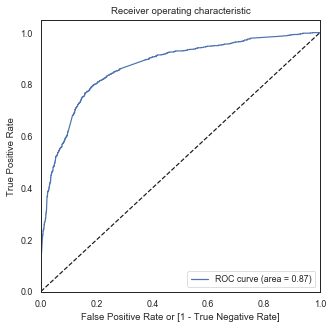

In [119]:
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Converted_prob)

### Assigning the Lead score for each Prospect ID from the original data
The final step is to merge the datasets from Train and Test datasets with the predicted Lead Score and attach the Lead score to the original dataset.

In [120]:
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
7527,0,0.058619,7527,0,1,0,0,0,0,0,0,0,0,0,0,6
2135,1,0.242888,2135,0,1,1,1,0,0,0,0,0,0,0,0,24
8742,1,0.210942,8742,0,1,1,1,0,0,0,0,0,0,0,0,21
7521,1,0.972362,7521,1,1,1,1,1,1,1,1,1,1,1,1,97
3937,1,0.957131,3937,1,1,1,1,1,1,1,1,1,1,1,1,96


In [121]:
# Create Dataset with y_train Prospect ID and Lead score
y_train_score = y_train_pred_final[['Prospect ID','Lead_Score']]

# Create Dataset with y_test Prospect ID and Lead score
y_test_score = y_test_pred_final[['Prospect ID','Lead_Score']]

# Concatenate the y_train scores and the y_test scores
df_score = pd.concat([y_train_score, y_test_score], ignore_index=True)

# Set the index of the final score dataset as the Prospect ID to concatenate the score dataset to the original data
df_score.set_index('Prospect ID', inplace=True)

# Inner Join the Original Leads dataset with the scores dataset. This will add a new column 'Lead_Score' to the 
# Original dataset. 
lead_copy = lead_copy.join(df_score['Lead_Score'])

lead_copy.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,24.0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,27.0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,63.0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,11.0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,29.0


### Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [122]:
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

TotalVisits                                             0.82
Total Time Spent on Website                             4.62
Lead Origin_Lead Add Form                               4.61
Lead Source_Olark Chat                                  1.62
Last Activity_Converted to Lead                        -1.21
Last Activity_Email Bounced                            -1.82
Last Activity_Olark Chat Conversation                  -1.61
Last Activity_SMS Sent                                  1.23
Specialization_Marketing Management                     0.35
What is your current occupation_Working Professional    2.75
dtype: float64

Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [123]:
#feature_importance = abs(new_params)

feature_importance = model_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                             17.84
Total Time Spent on Website                            100.00
Lead Origin_Lead Add Form                               99.78
Lead Source_Olark Chat                                  35.07
Last Activity_Converted to Lead                        -26.09
Last Activity_Email Bounced                            -39.38
Last Activity_Olark Chat Conversation                  -34.96
Last Activity_SMS Sent                                  26.65
Specialization_Marketing Management                      7.48
What is your current occupation_Working Professional    59.54
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [124]:
# Sort the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                             5
Total Time Spent on Website                             6
Lead Origin_Lead Add Form                               4
Lead Source_Olark Chat                                  8
Last Activity_Converted to Lead                         0
Last Activity_Email Bounced                             7
Last Activity_Olark Chat Conversation                   3
Last Activity_SMS Sent                                  9
Specialization_Marketing Management                     2
What is your current occupation_Working Professional    1
dtype: int64

Plot showing the feature variables based on their relative coefficient values

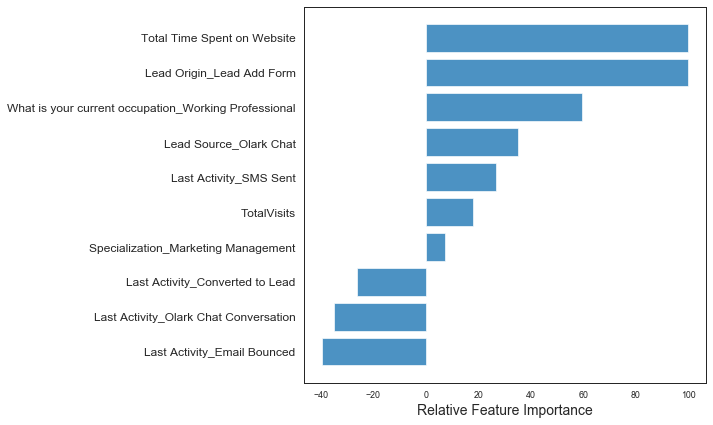

In [125]:
# Plot to show the realtive Importance of each feature in the model 
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1, 1, 1)
ax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Final Observations and Recommendations

**The Final Evaluation Metrics for the train Dataset:**
- The Accuracy is : 0.81
- The Sensitivity is : 0.71
- The Specificity is : 0.88
- The Precision is : 0.78
- The Recall is : 0.88
- The f1 score is : 0.83


**The Final Evaluation Metrics for the test Dataset:**
- The Accuracy is : 0.81
- The Sensitivity is : 0.80
- The Specificity is : 0.81
- The Precision is : 0.72
- The Recall is : 0.81
- The f1 score is : 0.76

X-Education has a better chance of converting a potential lead when:
- **The total time spent on the Website is high:** Leads who have spent more time on the website have converted
- **Current Occupation is specified:** Leads who are working professionals have high chances of getting converted. People who were looking for better prospects like Unemployed, students, Housewives and Business professionals were also good prospects to focus on.
- **When the Lead origin was Lead Add form** Leads who have responded/ or engaged through Lead Add Forms have had a higher chances of getting converted.
- **Number of Total Visits were high** Leads who have made a greater number of visits have higher chances of getting converted.
- **Lead Source Olark Chat** Leads who have responded/ or engaged through Olark chat have had a higher chances of getting converted.